In [1]:
import netCDF4 as nc

In [2]:
fn = '/gpfs_common/share02/rhe/twu27/roms_output/EnKF_surface_1993to2021_12km.nc'
ds = nc.Dataset(fn)

In [3]:
ds

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF3_64BIT_OFFSET data model, file format NETCDF3):
    type: Surface model results
    title: Daily averaged surface output from EnKF reanalysis
    dimensions(sizes): xi_rho(353), eta_rho(280), ocean_time(10408)
    variables(dimensions): int32 spherical(), float64 lon_rho(eta_rho, xi_rho), float64 lat_rho(eta_rho, xi_rho), float64 ocean_time(ocean_time), float32 SSH(ocean_time, eta_rho, xi_rho), float32 SST(ocean_time, eta_rho, xi_rho), float32 SSS(ocean_time, eta_rho, xi_rho), float32 SSU(ocean_time, eta_rho, xi_rho), float32 SSV(ocean_time, eta_rho, xi_rho), float64 mask_rho(eta_rho, xi_rho), float64 h(eta_rho, xi_rho)
    groups: 

In [20]:
print (ds.__dict__)

{'type': 'Surface model results', 'title': 'Daily averaged surface output from EnKF reanalysis'}


In [6]:
for dim in ds.dimensions.values():
    print(dim)

<class 'netCDF4._netCDF4.Dimension'>: name = 'xi_rho', size = 353
<class 'netCDF4._netCDF4.Dimension'>: name = 'eta_rho', size = 280
<class 'netCDF4._netCDF4.Dimension'> (unlimited): name = 'ocean_time', size = 10408


In [4]:
import netCDF4
from netCDF4 import num2date
import numpy as np
import os
import pandas as pd

 
# Open netCDF4 file
f = netCDF4.Dataset(fn)
 
# Extract variable
SST = f.variables['SST']
 
# Get dimensions assuming 3D: time, latitude, longitude
time_dim, lat_dim, lon_dim = SST.get_dims()
time_var = f.variables[time_dim.name]
times = num2date(time_var[:], time_var.units)
latitudes = f.variables['lat_rho'][:]
longitudes = f.variables['lon_rho'][:]

In [5]:
df = pd.DataFrame(SST[0, :, :])

ValueError: DataFrame constructor not properly called!

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Columns: 353 entries, 0 to 352
dtypes: float32(353)
memory usage: 386.2 KB


In [12]:
df

,0,1,2,3,4,5,6,7,8,9,...,343,344,345,346,347,348,349,350,351,352
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.467442,25.367004,25.279345,25.257259,25.236465,25.363075,25.441353,25.550541,25.628143,25.716930
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.542187,25.539454,25.530396,25.567806,25.650362,25.737415,25.818054,25.905285,25.983669,26.049332
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.079691,26.083786,26.123493,26.168596,26.210241,26.232201,26.272755,26.304274,26.344135,26.373533
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.534210,26.577896,26.597805,26.628666,26.660360,26.678593,26.689623,26.685814,26.681999,26.686848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.056211,9.516253,9.202923,7.087765,5.535953,4.316791,5.230734,4.390632,3.778672,3.622150
276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.685530,9.487076,8.648284,5.797104,4.209948,3.940217,4.133151,3.416861,3.120157,3.004584
277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.709002,6.881606,5.048236,4.087628,3.263635,3.232300,3.128590,2.953291,2.964184,2.986233
278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.479858,4.117426,3.621872,3.142383,3.186081,3.442983,3.637500,3.129128,3.152438,3.438028


In [13]:
f.variables

{'spherical': <class 'netCDF4._netCDF4.Variable'>
 int32 spherical()
     long_name: grid type logical switch
     flag_values: [0 1]
     flag_meanings: Cartesian spherical
 unlimited dimensions: 
 current shape = ()
 filling on, default _FillValue of -2147483647 used,
 'lon_rho': <class 'netCDF4._netCDF4.Variable'>
 float64 lon_rho(eta_rho, xi_rho)
     long_name: longitude of RHO-points
     units: degree_east
     standard_name: longitude
 unlimited dimensions: 
 current shape = (280, 353)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'lat_rho': <class 'netCDF4._netCDF4.Variable'>
 float64 lat_rho(eta_rho, xi_rho)
     long_name: latitude of RHO-points
     units: degree_north
     standard_name: latitude
 unlimited dimensions: 
 current shape = (280, 353)
 filling on, default _FillValue of 9.969209968386869e+36 used,
 'ocean_time': <class 'netCDF4._netCDF4.Variable'>
 float64 ocean_time(ocean_time)
     long_name: time since intialization
     units: days since 1

In [21]:
df

,0,1,2,3,4,5,6,7,8,9,...,343,344,345,346,347,348,349,350,351,352
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.467442,25.367004,25.279345,25.257259,25.236465,25.363075,25.441353,25.550541,25.628143,25.716930
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,25.542187,25.539454,25.530396,25.567806,25.650362,25.737415,25.818054,25.905285,25.983669,26.049332
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.079691,26.083786,26.123493,26.168596,26.210241,26.232201,26.272755,26.304274,26.344135,26.373533
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,26.534210,26.577896,26.597805,26.628666,26.660360,26.678593,26.689623,26.685814,26.681999,26.686848
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.056211,9.516253,9.202923,7.087765,5.535953,4.316791,5.230734,4.390632,3.778672,3.622150
276,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.685530,9.487076,8.648284,5.797104,4.209948,3.940217,4.133151,3.416861,3.120157,3.004584
277,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7.709002,6.881606,5.048236,4.087628,3.263635,3.232300,3.128590,2.953291,2.964184,2.986233
278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.479858,4.117426,3.621872,3.142383,3.186081,3.442983,3.637500,3.129128,3.152438,3.438028


In [22]:
img = df.to_numpy()

In [2]:
img

NameError: name 'img' is not defined

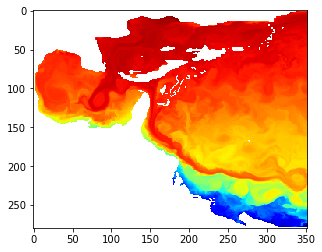

In [28]:
from matplotlib import pyplot as plt
plt.imshow(img, interpolation='nearest',cmap='jet')
plt.show()

In [7]:
from PIL import Image
import numpy as np
from pathlib import Path

In [12]:
# Write input images
day = 0
input_data = []
for itr in range(60):
    curr_df = pd.DataFrame(SST[itr])
    curr_img = curr_df.to_numpy()
    img = Image.fromarray(curr_img)
    img = img.convert('RGB')
    img.save("/gpfs_common/share02/rhe/nkpatel8/SST_temp/" + "day_" + str(day) + ".jpeg")
    day +=1
    

In [11]:
# Load dataset
input_data = []
image_id = 0
ww = 512 
hh = 512
color = (255,255,255)
ht, wd, cc= (280, 353, 3)
xx = 0
yy = 0
disk_dir = Path("/gpfs_common/share02/rhe/nkpatel8/SST_imgs/")
for i in range(0,60):
    img = np.array(Image.open(disk_dir / f"day_{image_id}.jpeg"))
    resized = np.full((hh,ww,cc), color, dtype=np.float64)
    resized[yy:yy+ht, xx:xx+wd] = img

    input_data.append(resized)   
    image_id += 1

In [137]:
input_data[0].shape

(512, 512, 3)

In [89]:
input_data[0].shape

(280, 353, 3)

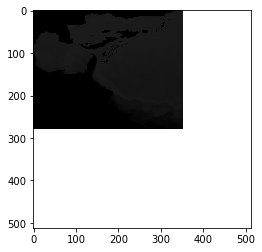

In [93]:
from matplotlib import pyplot as plt
plt.imshow(result, interpolation='nearest',cmap='jet')
plt.show()

In [142]:
X.shape

(0,)

In [38]:
def split_sequence(sequence, n_steps_in, n_steps_out):
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps_in
        out_end_ix = end_ix + n_steps_out
        # check if we are beyond the sequence
        if out_end_ix > len(sequence):
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix:out_end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [144]:
n_steps_in, n_steps_out = 30, 30
X, y = split_sequence(input_data, n_steps_in, n_steps_out)

In [148]:
X.shape

(30, 512, 512, 3)

In [146]:
X = X.reshape ((30,512,512,3))


In [147]:
y = y.reshape ((30,512,512,3))

In [127]:
X = X.astype(float)
y = y.astype(float)


MemoryError: Unable to allocate 24.8 GiB for an array with shape (4230, 512, 512, 3) and data type float64

In [134]:
print (len (input_data))

200


In [62]:
import tensorflow as tf


In [156]:

from tensorflow.python.keras.layers import  Input, Conv2D, BatchNormalization, Dropout, MaxPool2D, Flatten, Dense, Reshape, Conv2DTranspose, GlobalAveragePooling2D, UpSampling2D

In [167]:
input_shape=( 512,512,3)

#ENCODER
inp = Input(input_shape)
e = Conv2D(8, (3, 3), activation='leaky_relu')(inp)
e = BatchNormalization(momentum=0.0)(e)
e = MaxPool2D((2, 2))(e)
e = Dropout(.2)(e)

e = Conv2D(16, (3, 3), activation='leaky_relu')(e)
e = BatchNormalization(momentum=0.0)(e)
e = MaxPool2D((2, 2))(e)
e = Dropout(.2)(e)

e = Conv2D(32, (3, 3), activation='leaky_relu')(e)
e = BatchNormalization(momentum=0.0)(e)
e = MaxPool2D((2, 2))(e)
e = Dropout(.2)(e)

e = Conv2D(64, (3, 3), activation='leaky_relu')(e)
e = BatchNormalization(momentum=0.0)(e)
e = MaxPool2D((2, 2))(e)
e = Dropout(.2)(e)

e = Conv2D(128, (3, 3), activation='leaky_relu')(e)
e = BatchNormalization(momentum=0.0)(e)
e = MaxPool2D((2, 2))(e)
e = Dropout(.2)(e)


l = GlobalAveragePooling2D()(e)
l = Dense(256, activation='linear')(l)
#DECODER
d = Reshape((16,16,1))(l)
d = Conv2DTranspose(128,(3, 3), strides=2, activation='relu', padding='same')(d)
d = BatchNormalization()(d)
d = UpSampling2D(size=(2, 2))(d)

d = Conv2DTranspose(64,(3, 3), strides=2, activation='relu', padding='same')(d)
d = BatchNormalization()(d)
d = UpSampling2D(size=(2, 2))(d)

d = Conv2DTranspose(32,(3, 3), activation='relu', padding='same')(d)
d = BatchNormalization()(d)
d = UpSampling2D(size=(2, 2))(d)

d = Conv2DTranspose(16,(3, 3), activation='relu', padding='same')(d)
d = BatchNormalization()(d)
#d = UpSampling2D(size=(2, 2))(d)

d = Conv2DTranspose(8,(3, 3), activation='relu', padding='same')(d)
d = BatchNormalization()(d)
#d = UpSampling2D(size=(1, 2))(d)

decoded = Conv2D(3, (3, 3), activation='linear', padding='same')(d)

ae = tf.keras.Model(inp, decoded)
ae.summary()




Model: "model_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Total params: 232,931
Trainable params: 231,939
Non-trainable params: 992
_________________________________________________________________


In [168]:
inp1 = Input(input_shape)
temp = Conv2D(8, (3, 3), activation='leaky_relu')(inp1)
temp = BatchNormalization(momentum=0.0)(temp)
temp = MaxPool2D((2, 2))(temp)
temp = Dropout(.2)(temp)

temp = Conv2D(16, (3, 3), activation='leaky_relu')(temp)
temp = BatchNormalization(momentum=0.0)(temp)
temp = MaxPool2D((2, 2))(temp)
temp = Dropout(.2)(temp)

temp = Conv2D(32, (3, 3), activation='leaky_relu')(temp)
temp = BatchNormalization(momentum=0.0)(temp)
temp = MaxPool2D((2, 2))(temp)
temp = Dropout(.2)(temp)

temp = Conv2D(64, (3, 3), activation='leaky_relu')(temp)
temp = BatchNormalization(momentum=0.0)(temp)
temp = MaxPool2D((2, 2))(temp)
temp = Dropout(.2)(temp)

temp = Conv2D(128, (3, 3), activation='leaky_relu')(temp)
temp = BatchNormalization(momentum=0.0)(temp)
temp = MaxPool2D((2, 2))(temp)
temp = Dropout(.2)(temp)
temp_model = tf.keras.Model (temp)
temp_model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [ ]:
X.shape

In [154]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true))) 

In [163]:
ae.compile(optimizer="adam", loss=root_mean_squared_error)
ae.fit(X, y, epochs=2)

Epoch 1/2
1/1 [==============================] - 12s 12s/step - loss: 201.5152
Epoch 2/2
1/1 [==============================] - 8s 8s/step - loss: 201.2771


In [82]:
##CNN model doesnt work
# model = tf.keras.Sequential()


# model.add(Conv2D(32, 3, activation='relu', input_shape=(None, 280,353,3)))
# model.add(BatchNormalization(momentum=0.0))
# model.add(MaxPool2D( 2, strides=2))
# model.add(Dropout(.2, name='dropout1'))

# model.add(Conv2D(64, 3, activation='relu'))
# model.add(BatchNormalization(momentum=0.0))
# model.add(MaxPool2D(2, strides=2))
# model.add(Dropout(.2, name='dropout1'))

# model.add(Conv2D(128, 3, activation='relu'))
# model.add(BatchNormalization(momentum=0.0))
# model.add(MaxPool2D(2, strides=2, name='maxpool3'))
# model.add(Dropout(.2, name='dropout1'))

# model.add(Conv2D(256, 3, activation='relu'))
# model.add(BatchNormalization(momentum=0.0))
# model.add(MaxPool2D(2, strides=2, name='maxpool4'))
# model.add(Dropout(.2, name='dropout1'))

# model.add(Conv2D(512, 3, activation='relu'))
# model.add(BatchNormalization(momentum=0.0))
# model.add(MaxPool2D(2, strides=2))
# model.add(Dropout(.2, name='dropout1'))


# model.add(Dense(4096, activation='relu'))
# model.add(Dropout(.75))

# model.add(Dense(1024, activation='relu'))
# model.add(Dropout(.75, name='dropout2'))root_mean_squared_error

# model.add(Dense(30, activation='linear'))

# model.compile(optimizer='adam', loss='', metrics=['accuracy'])

# input_shape=(None, 280,353,3)
# model.build(input_shape)

In [169]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
module_wrapper_25 (ModuleWra multiple                  896       
_________________________________________________________________
module_wrapper_26 (ModuleWra multiple                  128       
_________________________________________________________________
module_wrapper_27 (ModuleWra multiple                  0         
_________________________________________________________________
module_wrapper_28 (ModuleWra multiple                  0         
_________________________________________________________________
module_wrapper_29 (ModuleWra multiple                  18496     
_________________________________________________________________
module_wrapper_30 (ModuleWra multiple                  256       
_________________________________________________________________
module_wrapper_31 (ModuleWra multiple                 

In [80]:
model.fit (X, y, epochs = 3)

Epoch 1/3


TypeError: in user code:

    /usr/local/usrapps/rhe/conda_ocean/lib/python3.9/site-packages/keras/engine/training.py:853 train_function  *
        return step_function(self, iterator)
    /usr/local/usrapps/rhe/conda_ocean/lib/python3.9/site-packages/keras/engine/training.py:842 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /usr/local/usrapps/rhe/conda_ocean/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:1286 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /usr/local/usrapps/rhe/conda_ocean/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:2849 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /usr/local/usrapps/rhe/conda_ocean/lib/python3.9/site-packages/tensorflow/python/distribute/distribute_lib.py:3632 _call_for_each_replica
        return fn(*args, **kwargs)
    /usr/local/usrapps/rhe/conda_ocean/lib/python3.9/site-packages/keras/engine/training.py:835 run_step  **
        outputs = model.train_step(data)
    /usr/local/usrapps/rhe/conda_ocean/lib/python3.9/site-packages/keras/engine/training.py:787 train_step
        y_pred = self(x, training=True)
    /usr/local/usrapps/rhe/conda_ocean/lib/python3.9/site-packages/keras/engine/base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /usr/local/usrapps/rhe/conda_ocean/lib/python3.9/site-packages/keras/engine/sequential.py:383 call
        outputs = layer(inputs, **kwargs)
    /usr/local/usrapps/rhe/conda_ocean/lib/python3.9/site-packages/keras/engine/base_layer.py:1037 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /usr/local/usrapps/rhe/conda_ocean/lib/python3.9/site-packages/keras/engine/functional.py:1441 call
        return getattr(self._module, self._method_name)(*args, **kwargs)
    /usr/local/usrapps/rhe/conda_ocean/lib/python3.9/site-packages/tensorflow/python/keras/engine/base_layer.py:1057 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    /usr/local/usrapps/rhe/conda_ocean/lib/python3.9/site-packages/tensorflow/python/keras/layers/convolutional.py:253 call
        outputs = self._convolution_op(inputs, self.kernel)
    /usr/local/usrapps/rhe/conda_ocean/lib/python3.9/site-packages/tensorflow/python/util/dispatch.py:206 wrapper
        return target(*args, **kwargs)
    /usr/local/usrapps/rhe/conda_ocean/lib/python3.9/site-packages/tensorflow/python/ops/nn_ops.py:1131 convolution_v2
        return convolution_internal(
    /usr/local/usrapps/rhe/conda_ocean/lib/python3.9/site-packages/tensorflow/python/ops/nn_ops.py:1261 convolution_internal
        return op(
    /usr/local/usrapps/rhe/conda_ocean/lib/python3.9/site-packages/tensorflow/python/ops/nn_ops.py:2715 _conv2d_expanded_batch
        return gen_nn_ops.conv2d(
    /usr/local/usrapps/rhe/conda_ocean/lib/python3.9/site-packages/tensorflow/python/ops/gen_nn_ops.py:969 conv2d
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    /usr/local/usrapps/rhe/conda_ocean/lib/python3.9/site-packages/tensorflow/python/framework/op_def_library.py:628 _apply_op_helper
        _SatisfiesTypeConstraint(base_type,
    /usr/local/usrapps/rhe/conda_ocean/lib/python3.9/site-packages/tensorflow/python/framework/op_def_library.py:59 _SatisfiesTypeConstraint
        raise TypeError(

    TypeError: Value passed to parameter 'input' has DataType uint8 not in list of allowed values: float16, bfloat16, float32, float64, int32


In [ ]:
from keras.preprocessing.image import ImageDataGenerator

gen = ImageDataGenerator()
train_im = ImageDataGenerator(
               rescale=1./255,
               shear_range=0.2,
               horizontal_flip=False)
def train_images():
    train_generator = train_im.flow_from_directory (
            path, 
             target_size=(512, 512),
             color_mode='gray',
             batch_size=100,
             shuffle = True,
             class_mode='categorical')
    x =  train_generator
    return x[0][0], x[0][1]